# Support Vector Regression

Importing The Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Importing The Dataser

In [36]:
dataset = pd.read_csv("./data/Position_Salaries.csv")


In [37]:
# Printing The First 5 Values of The dataset
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [38]:
# Infomation About The Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [39]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [40]:
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [41]:
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [42]:
# Reshaping Y 
Y = Y.reshape(-1,1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling

In [43]:
sc_x = StandardScaler()
sc_y = StandardScaler()
Y = sc_y.fit_transform(Y)
X = sc_x.fit_transform(X)

In [44]:
print(X)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [45]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training The SVR model on the Dataset

In [46]:
from sklearn.svm import SVR
model = SVR(kernel="rbf")
model.fit(X,Y)

c:\Users\kanishk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [47]:
sc_y.inverse_transform(model.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visualising The Polynomial Regression

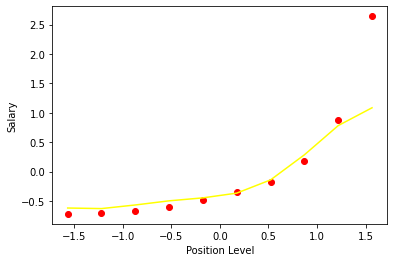

In [48]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),color="red")
plt.plot(X,model.predict(X) , color="yellow")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()